In [1]:
import numpy as np

In [5]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
%matplotlib inline

In [8]:
df=pd.read_csv("pd_speech_features2.csv")

In [10]:
df.drop(["id",'gender'],axis=1)

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,0.00008,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
751,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,0.00016,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
752,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,0.00011,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
753,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,0.00017,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [11]:
labels=df['class']

In [12]:
features=df.drop(['class'],axis=1)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,random_state=110)

In [18]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((528, 754), (528,), (227, 754), (227,))

In [19]:
print(y_train.mean())

0.7424242424242424


In [20]:
print(y_test.mean())

0.7577092511013216


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
#base estimator : a weak learner with max depth=2
shallow_tree=DecisionTreeClassifier(max_depth=2,random_state=100)

In [24]:
#fit the shallow decision Tree
shallow_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=100)

In [28]:
#test Error
y_pred=shallow_tree.predict(x_test)

In [26]:
score=metrics.accuracy_score(y_test,y_pred)

In [27]:
score

0.8325991189427313

In [29]:
# ada boost with the tree as base estimator

In [ ]:
# adaboost with the tree as base estimator

estimators = list(range(1, 100, 2))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(x_train, y_train)
    y_pred = ABC.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)
    

In [59]:
abc_scores

[0.8325991189427313,
 0.8370044052863436,
 0.8149779735682819,
 0.8325991189427313,
 0.8634361233480177,
 0.8546255506607929,
 0.8325991189427313,
 0.8590308370044053,
 0.8502202643171806,
 0.8590308370044053,
 0.8414096916299559,
 0.8590308370044053,
 0.8634361233480177,
 0.8722466960352423,
 0.8854625550660793,
 0.8766519823788547,
 0.8810572687224669,
 0.8766519823788547,
 0.8766519823788547,
 0.8766519823788547,
 0.8942731277533039,
 0.8942731277533039,
 0.8854625550660793,
 0.8942731277533039,
 0.8986784140969163]

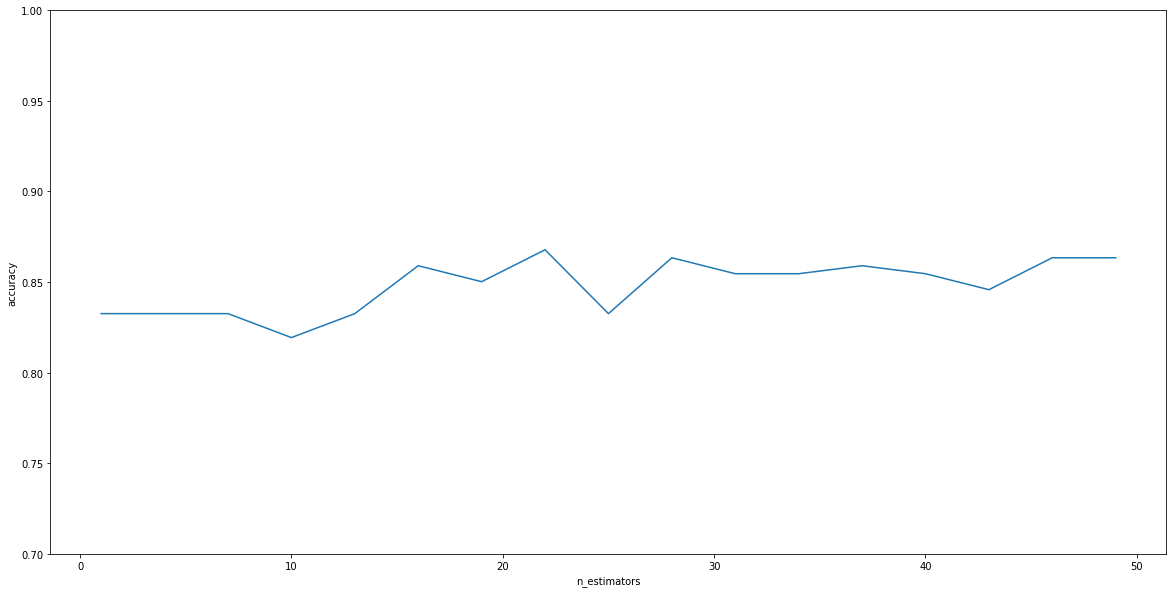

In [57]:
# plot test scores and n_estimators
# plot
plt.figure(figsize=(20,10))
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.70, 1])
plt.show()